<a href="https://colab.research.google.com/github/sahoodib/zoo-repository-hackNJIT/blob/Sentiment_Analysis/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install praw

     |████████████████████████████████| 176 kB 34.0 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 


In [ ]:
import praw 
import pandas as pd
import numpy as np
from praw.models import MoreComments
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import decimal
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import re

In [ ]:
user_agent = "Scraper 1.0 by /u/UniqueVictory516"
reddit = praw.Reddit(
    client_id="Q3XXUTRf_U2yNiRkiBfAng",
    client_secret="KauRdBF4hYz_iJfUI2MUZEWNrTugaA",
    #password="1guiwevlfo00esyy",
    #requestor_kwargs={"session": session},  # pass Session
    user_agent=user_agent,
    check_for_async = False
    #username="fakebot3",
)

In [ ]:
headlines = set()
hot = reddit.subreddit('Zoo+Employees+Veterinary+Restaurant').hot(limit=None)
for submission in hot:
  submission.comments.replace_more(limit=None)
  for comment in submission.comments.list():
    headlines.add(comment.body)
  print(len(headlines))

0
1
3
22
22
23
26
26
29
60
65
72
74
98
107
108
112
113
120
120
154
157
157
158
161
163
169
175
194
195
212
213
221
311
313
322
322
325
328
344
350
351
361
375
378
382
384
385
397
402
405
407
418
423
424
427
427
457
472
492
495
525
536
550
565
569
582
604
610
615
625
630
668
672
682
685
685
686
690
695
701
701
704
721
724
728
737
740
743
750
758
770
826
831
859
865
868
878
881
881
889
891
898
900
937
937
940
941
941
942
948
949
956
979
979
990
1009
1012
1019
1021
1021
1026
1030
1031
1048
1103
1107
1108
1110
1111
1113
1117
1118
1133
1136
1142
1146
1146
1174
1179
1180
1180
1189
1191
1205
1207
1214
1252
1253
1257
1295
1295
1316
1322
1331
1333
1342
1343
1346
1357
1372
1372
1374
1374
1380
1382
1387
1393
1394
1397
1397
1409
1410
1413
1413
1415
1416
1416
1416
1425
1444
1457
1463
1467
1471
1481
1487
1490
1496
1502
1513
1517
1517
1522
1526
1532
1554
1554
1572
1580
1605
1611
1614
1622
1629
1629
1634
1639
1647
1648
1675
1683
1684
1693
1697
1698
1718
1732
1748
1756
1765
1768
1778
1780
1781
1794
180

In [ ]:
data = pd.DataFrame(headlines)
data

,0
0,Debt\nI've heard vet school is super expensive...
1,"Season 3 had a great ending, the best so far. ..."
2,Yerp. How many of them wanted to wear the boot...
3,Have you reached out to IDEXX? They can usuall...
4,"A muzzle? Seriously, I put a muzzle on any inj..."
...,...
2992,"Bacon, sausage, tomato, cheese and breakfast p..."
2993,I highly recommend the book. It inspired the s...
2994,Medivet helped me learn what I don’t want to g...
2995,This has been a real drain on our clinic as we...


In [ ]:
data.to_csv('/content/drive/MyDrive/scrap.csv', header=False, encoding='utf-8', index=False )

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results =[]
for line in headlines:
  pol_score = sia.polarity_scores(line)
  pol_score['text'] = line
  results.append(pol_score)
pprint.pprint(results[:5], width=100)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[{'compound': -0.7203,
  'neg': 0.342,
  'neu': 0.555,
  'pos': 0.103,
  'text': 'Debt\n'
          "I've heard vet school is super expensive so any tips on how to pay debt off fast ? I "
          "don't want to have to pay loans off until I die"},
 {'compound': 0.7458,
  'neg': 0.127,
  'neu': 0.516,
  'pos': 0.357,
  'text': 'Season 3 had a great ending, the best so far. The problem is that the series ended.'},
 {'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'text': 'Yerp. How many of them wanted to wear the booty shorts?'},
 {'compound': 0.1027,
  'neg': 0.0,
  'neu': 0.92,
  'pos': 0.08,
  'text': 'Have you reached out to IDEXX? They can usually provide reference ranges for the '
          'platform you’re using.'},
 {'compound': 0.4434,
  'neg': 0.186,
  'neu': 0.557,
  'pos': 0.257,
  'text': 'A muzzle? Seriously, I put a muzzle on any injured pet. Even the nicest, well-trained '
          'pet will bite when they’re in pain. Not their fault. And not your fault. T

In [ ]:
df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,text
0,0.342,0.555,0.103,-0.7203,Debt\nI've heard vet school is super expensive...
1,0.127,0.516,0.357,0.7458,"Season 3 had a great ending, the best so far. ..."
2,0.000,1.000,0.000,0.0000,Yerp. How many of them wanted to wear the boot...
3,0.000,0.920,0.080,0.1027,Have you reached out to IDEXX? They can usuall...
4,0.186,0.557,0.257,0.4434,"A muzzle? Seriously, I put a muzzle on any inj..."
...,...,...,...,...,...
2992,0.000,1.000,0.000,0.0000,"Bacon, sausage, tomato, cheese and breakfast p..."
2993,0.000,0.778,0.222,0.4582,I highly recommend the book. It inspired the s...
2994,0.000,0.866,0.134,0.8126,Medivet helped me learn what I don’t want to g...
2995,0.104,0.723,0.173,0.8753,This has been a real drain on our clinic as we...


In [ ]:
def float_range(start, stop, step):
  while start < stop:
    yield float(start)
    start += decimal.Decimal(step)

In [ ]:
df['label'] = "Neutral"#float_range(0.45, 0.59,0.01) # neutral sentiments
df.loc[df['compound']> 0.59, 'label'] = "Positive" #positive sentiments 
df.loc[df['compound']< 0.45, 'label'] = "Negative" #negative sentiments
df


,neg,neu,pos,compound,text,label
0,0.342,0.555,0.103,-0.7203,Debt\nI've heard vet school is super expensive...,Negative
1,0.127,0.516,0.357,0.7458,"Season 3 had a great ending, the best so far. ...",Positive
2,0.000,1.000,0.000,0.0000,Yerp. How many of them wanted to wear the boot...,Negative
3,0.000,0.920,0.080,0.1027,Have you reached out to IDEXX? They can usuall...,Negative
4,0.186,0.557,0.257,0.4434,"A muzzle? Seriously, I put a muzzle on any inj...",Negative
...,...,...,...,...,...,...
2992,0.000,1.000,0.000,0.0000,"Bacon, sausage, tomato, cheese and breakfast p...",Negative
2993,0.000,0.778,0.222,0.4582,I highly recommend the book. It inspired the s...,Neutral
2994,0.000,0.866,0.134,0.8126,Medivet helped me learn what I don’t want to g...,Positive
2995,0.104,0.723,0.173,0.8753,This has been a real drain on our clinic as we...,Positive


In [ ]:
sentiraw = df[['text', 'label']]
sentiraw

,text,label
0,Debt\nI've heard vet school is super expensive...,Negative
1,"Season 3 had a great ending, the best so far. ...",Positive
2,Yerp. How many of them wanted to wear the boot...,Negative
3,Have you reached out to IDEXX? They can usuall...,Negative
4,"A muzzle? Seriously, I put a muzzle on any inj...",Negative
...,...,...
2992,"Bacon, sausage, tomato, cheese and breakfast p...",Negative
2993,I highly recommend the book. It inspired the s...,Neutral
2994,Medivet helped me learn what I don’t want to g...,Positive
2995,This has been a real drain on our clinic as we...,Positive


In [ ]:
sentidata = df[['text']]
sentidata

,text
0,Debt\nI've heard vet school is super expensive...
1,"Season 3 had a great ending, the best so far. ..."
2,Yerp. How many of them wanted to wear the boot...
3,Have you reached out to IDEXX? They can usuall...
4,"A muzzle? Seriously, I put a muzzle on any inj..."
...,...
2992,"Bacon, sausage, tomato, cheese and breakfast p..."
2993,I highly recommend the book. It inspired the s...
2994,Medivet helped me learn what I don’t want to g...
2995,This has been a real drain on our clinic as we...


In [ ]:
sentilabel = df[['label']]
sentilabel

,label
0,Negative
1,Positive
2,Negative
3,Negative
4,Negative
...,...
2992,Negative
2993,Neutral
2994,Positive
2995,Positive


In [ ]:
sentiraw.to_csv('/content/drive/MyDrive/sentiments.csv', header=False, encoding='utf-8', index=False )

In [ ]:
sentidata.to_csv('/content/drive/MyDrive/sentitext.csv', header=False, encoding='utf-8', index=False )

In [ ]:
sentilabel.to_csv('/content/drive/MyDrive/sentilabel.csv', header=False, encoding='utf-8', index=False )

In [ ]:
df.label.value_counts()

Negative    1816
Positive     953
Neutral      228
Name: label, dtype: int64

In [ ]:
df.label.value_counts(normalize=True)*100

Negative    60.593927
Positive    31.798465
Neutral      7.607608
Name: label, dtype: float64

In [ ]:
print("positive sentiment:\n")
pprint.pprint(list(df[df['label'] == "Positive"].text)[:10], width=200)

print("negative sentiment:\n")
pprint.pprint(list(df[df['label'] == "Negative"].text)[:10], width=200)

#print("neutral sentiment:\n")
#pprint.pprint(list(df[df['label'] == "Neutral"].text)[:10], width=200)

positive sentiment:

['Season 3 had a great ending, the best so far. The problem is that the series ended.',
 'i love lucy the candy episode, Lucy and Ethel get jobs.',
 'I think this is a clever concept as we (as a society) move toward a more contactless experience, but not necessarily an anti-social one. If I catch the right drift, it sounds like the proposed '
 'experience would allow for more quality time with your companions.\n'
 '\n'
 'If you’ve been to said restaurant on many occasions and know exactly what you want, why should you have to go through the waiting game just get the part where you’re enjoying what you came for? '
 'I’m a regular at many local restaurants and far more enjoy chatting with the employees about their life, not about the menu.\n'
 '\n'
 'Sign me up for this idea, where can I go?!',
 "Working in restaurants aren't really about passion and theoretical knowledge. It's about being a team player, to keep your fucking head down, being fast and efficient, worki

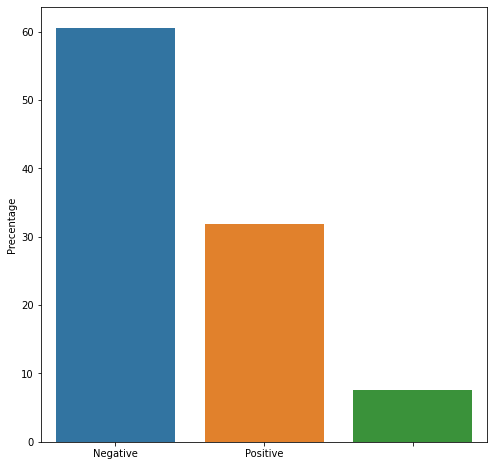

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
stats = df.label.value_counts(normalize=True)*100
sns.barplot(x=stats.index, y=stats, ax=ax)
ax.set_xticklabels(['Negative','Neutral' 'Positive'])
ax.set_ylabel('Precentage')
plt.show()

In [ ]:
!mv "/content/amazon_alexa.tsv" "/content/drive/MyDrive"

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/sentiments.csv')
data.columns=['text','label']
data

,text,label
0,"Season 3 had a great ending, the best so far. ...",Positive
1,Yerp. How many of them wanted to wear the boot...,Negative
2,Have you reached out to IDEXX? They can usuall...,Negative
3,"A muzzle? Seriously, I put a muzzle on any inj...",Negative
4,Whats in it,Negative
...,...,...
2991,"Bacon, sausage, tomato, cheese and breakfast p...",Negative
2992,I highly recommend the book. It inspired the s...,Neutral
2993,Medivet helped me learn what I don’t want to g...,Positive
2994,This has been a real drain on our clinic as we...,Positive


In [ ]:
data = data[data['label']!='Neutral']
data

,text,label
0,"Season 3 had a great ending, the best so far. ...",Positive
1,Yerp. How many of them wanted to wear the boot...,Negative
2,Have you reached out to IDEXX? They can usuall...,Negative
3,"A muzzle? Seriously, I put a muzzle on any inj...",Negative
4,Whats in it,Negative
...,...,...
2990,"Listen, I want it as much as the next but, let...",Positive
2991,"Bacon, sausage, tomato, cheese and breakfast p...",Negative
2993,Medivet helped me learn what I don’t want to g...,Positive
2994,This has been a real drain on our clinic as we...,Positive


In [ ]:
#Check if there are any null values
data = data[['text','label']]
data.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
def cleaning(df, stop_words):

    df['text'] = df['text'].apply(lambda x: 

            ' '.join(x.lower() for x in x.split()))

    # Replacing the special characters
    df['text'] = df['text'].map(lambda x: re.sub(r'\W+', '', x))

    # Replacing the digits/numbers

    df['text'] = df['text'].str.replace('d', ''

            )

    # Removing stop words

    df['text'] = df['text'].apply(lambda x: 

            ' '.join(x for x in x.split() if x not in stop_words))

    # Lemmatization

    df['text'] = df['text'].apply(lambda x: 

            ' '.join([Word(x).lemmatize() for x in x.split()]))

    return df

stop_words = stopwords.words('english')

data = cleaning(data, stop_words)
data

,text,label
0,season3haagreateningthebestsofartheproblemisth...,Positive
1,yerphowmanyofthemwantetowearthebootyshorts,Negative
2,haveyoureacheouttoiexxtheycanusuallyprovierefe...,Negative
3,amuzzleseriouslyiputamuzzleonanyinjurepetevent...,Negative
4,whatsinit,Negative
...,...,...
2990,listeniwantitasmuchasthenextbutletslookatthefa...,Positive
2991,baconsausagetomatocheeseanbreakfastpatties,Negative
2993,meivethelpemelearnwhationtwanttogetoutofmyplac...,Positive
2994,thishasbeenarealrainonourclinicaswellontopofsh...,Positive


In [ ]:
from wordcloud import WordCloud

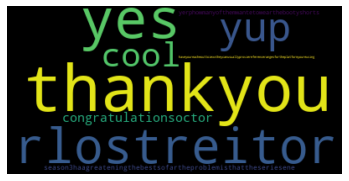

In [ ]:
common_words=''
for i in data.text:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Encoded the target column
lb=LabelEncoder()
data['label'] = lb.fit_transform(data['label'])
data

,text,label
0,season3haagreateningthebestsofartheproblemisth...,1
1,yerphowmanyofthemwantetowearthebootyshorts,0
2,haveyoureacheouttoiexxtheycanusuallyprovierefe...,0
3,amuzzleseriouslyiputamuzzleonanyinjurepetevent...,0
4,whatsinit,0
...,...,...
2990,listeniwantitasmuchasthenextbutletslookatthefa...,1
2991,baconsausagetomatocheeseanbreakfastpatties,0
2993,meivethelpemelearnwhationtwanttogetoutofmyplac...,1
2994,thishasbeenarealrainonourclinicaswellontopofsh...,1


In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)
X

array([[ 0,  0,  0, ...,  0,  0, 10],
       [ 0,  0,  0, ...,  0,  0, 11],
       [ 0,  0,  0, ...,  0,  0, 12],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 17, 120)           60000     
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 17, 120)          0         
 lDropout1D)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 176)               209088    
                                                                 
 dense_6 (Dense)             (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Splitting the data into training and testing
y=pd.get_dummies(data['label'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
61/61 [==============================] - 7s 73ms/step - loss: 0.6488 - accuracy: 0.6546
Epoch 2/5
61/61 [==============================] - 4s 73ms/step - loss: 0.6469 - accuracy: 0.6541
Epoch 3/5
61/61 [==============================] - 4s 72ms/step - loss: 0.6438 - accuracy: 0.6541
Epoch 4/5
61/61 [==============================] - 4s 72ms/step - loss: 0.6388 - accuracy: 0.6541
Epoch 5/5
61/61 [==============================] - 4s 74ms/step - loss: 0.6163 - accuracy: 0.6779


In [ ]:
model.evaluate(X_test,y_test)

26/26 [==============================] - 1s 10ms/step - loss: 0.6605 - accuracy: 0.6522


[0.6605145931243896, 0.6522262096405029]